In [87]:
import pandas as pd
from pathlib import Path
import streamlit as st
import numpy as np
import yfinance as yf
import hvplot.pandas
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import holoviews as hv
import seaborn as sns
%matplotlib inline

In [88]:
#Set Initial Params
initial_investment = 10000
tickers = ['TSLA', 'NVDA', 'AMZN', '^GSPC']

end_date = datetime.today().date()
start_date = end_date - timedelta(days=365)

stocks = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  4 of 4 completed


<Axes: xlabel='Date'>

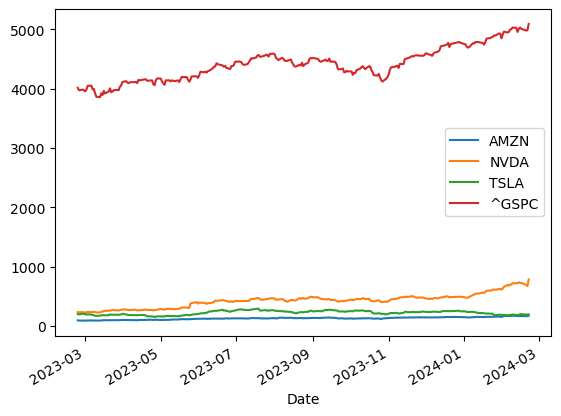

In [101]:
stocks.plot()

In [103]:
price_correlation = stocks.corr()
price_correlation

,AMZN,NVDA,TSLA,^GSPC
AMZN,1.000000,0.961437,0.390231,0.953187
NVDA,0.961437,1.000000,0.340435,0.943501
TSLA,0.390231,0.340435,1.000000,0.355552
^GSPC,0.953187,0.943501,0.355552,1.000000


<Axes: >

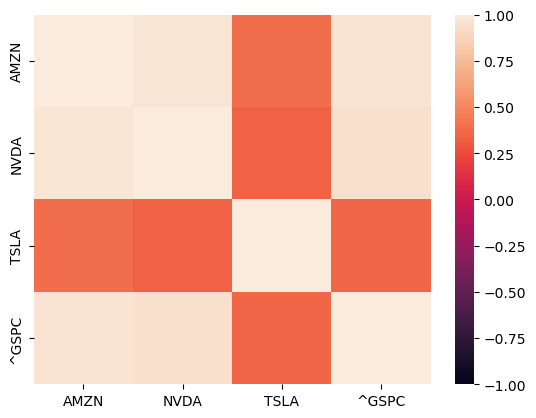

In [104]:
sns.heatmap(price_correlation, vmin = -1, vmax=1)

In [100]:
returns = stocks.pct_change().dropna()
returns.describe()

,AMZN,NVDA,TSLA,^GSPC
count,250.000000,250.000000,250.000000,250.000000
mean,0.002587,0.005220,0.000376,0.000980
std,0.019325,0.029392,0.030606,0.007811
min,-0.055772,-0.056768,-0.121253,-0.018459
25%,-0.009349,-0.011136,-0.016965,-0.003834
50%,0.001132,0.003931,0.000993,0.000836
75%,0.014910,0.019450,0.017244,0.005888
max,0.082693,0.243696,0.100925,0.021123


In [91]:
returns_summary = returns.describe().T.loc[:,["mean","std"]]
returns_summary

,mean,std
AMZN,0.002587,0.019325
NVDA,0.005220,0.029392
TSLA,0.000376,0.030606
^GSPC,0.000980,0.007811


In [105]:
returns_summary["mean"] = returns_summary["mean"] * 252
returns_summary["std"] = returns_summary["std"] * np.sqrt(252)

returns_summary

,mean,std
AMZN,164.286742,4.869891
NVDA,331.493024,7.406900
TSLA,23.848546,7.712657
^GSPC,62.240619,1.968332
